In [1]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

# Suppress valuewarning when fitting ARIMA model.
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)


# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from platform import python_version
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels as stm
import sklearn as skl


print('Python version', python_version())
print('Numpy version', np.__version__)
print('Scipy version', sp.__version__)
print('Pandas version', pd.__version__)
print('Matplotlib version', mpl.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', stm.__version__)
print('Scikit-learn version', skl.__version__)

Python version 3.12.5
Numpy version 2.0.2
Scipy version 1.14.1
Pandas version 2.2.3
Matplotlib version 3.9.2
Seaborn version 0.13.2
Statsmodels version 0.14.2
Scikit-learn version 1.5.2


# <font color='darkorange'> Your Turn -- LOAN dataset

## Load and explore data set

In [2]:
df = pd.read_csv("Trainset.csv")

In [3]:
df

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,211543,8006236,49,6,single,rented,no,Secretary,Surendranagar_Dudhrej,Gujarat,6,10,0
1,84776,6552503,21,15,married,rented,yes,Design_Engineer,Bareilly,Uttar_Pradesh,3,11,0
2,75848,7583437,74,13,single,owned,yes,Web_designer,Etawah,Uttar_Pradesh,9,13,0
3,9228,5132495,22,13,single,rented,no,Chef,Bhavnagar,Gujarat,6,10,0
4,162303,4436534,52,1,single,rented,no,Technical_writer,Dehri[30],Bihar,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,101406,340023,45,19,single,rented,no,Secretary,Aizawl,Mizoram,5,10,0
99996,1763,6943697,37,14,single,rented,no,Army_officer,Pali,Rajasthan,3,12,1
99997,79595,1543486,44,7,single,rented,no,Designer,Haldia,West_Bengal,5,13,1
99998,152861,9934305,31,9,single,rented,no,Police_officer,Kozhikode,Kerala,9,11,0


## Data preprocessing

Drop the columns `Id`, `Profession`, `CITY`, and `STATE`.  
Then apply appropriate encoding to the remaining columns as needed.

In [8]:
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from IPython.display import Image
from six import StringIO
from sklearn import tree

In [9]:
# Load datasets
train_df = pd.read_csv("Trainset.csv")  # Load training data
test_df = pd.read_csv("Testset.csv")  # Load test data

# Drop unnecessary columns
train_df = train_df.drop(columns=['Id', 'Profession', 'CITY', 'STATE'])
test_df = test_df.drop(columns=['Id', 'Profession', 'CITY', 'STATE'])


In [10]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Marital_Status', 'House_Ownership', 'Car_Ownership']
for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

In [11]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Marital_Status', 'House_Ownership', 'Car_Ownership']
for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

In [12]:
# Splitting data
X_train = train_df.drop(columns=['Risk_Flag'])
y_train = train_df['Risk_Flag']
X_test = test_df.drop(columns=['Risk_Flag'])
y_test = test_df['Risk_Flag']

## Model fitting

In [13]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Look at Feature Importance

In [14]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importances)


Feature Importance:
             Feature  Importance
0             Income    0.451217
1                Age    0.206240
2         Experience    0.097179
7  CURRENT_HOUSE_YRS    0.097102
6    CURRENT_JOB_YRS    0.088815
5      Car_Ownership    0.023577
3     Marital_Status    0.018179
4    House_Ownership    0.017691


## Evaluate the test performance

### Load and preprocess the test dataset

In [19]:
import graphviz

In [22]:
# Visualizing Decision Tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=X_train.columns, class_names=['No Risk', 'Risk'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("decision_tree.png")  # Saves as an image
Image(graph.create_png())  # Displays the tree

# Generate Decision Tree Structure using Matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['No Risk', 'Risk'], filled=True, rounded=True, fontsize=10)
plt.savefig("decision_tree_structure.png")  # Saves as an image
plt.show()

InvocationException: GraphViz's executables not found

<Figure size 2000x1000 with 0 Axes>

[Text(0.27982712969877455, 0.9871794871794872, 'Experience <= 2.5\ngini = 0.215\nsamples = 100000\nvalue = [87752, 12248]\nclass = No Risk'),
 Text(0.05868124064062399, 0.9615384615384616, 'Income <= 18602.0\ngini = 0.261\nsamples = 13430\nvalue = [11355, 2075]\nclass = No Risk'),
 Text(0.16925418516969926, 0.9743589743589745, 'True  '),
 Text(0.05852149064936031, 0.9358974358974359, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = Risk'),
 Text(0.058840990631887656, 0.9358974358974359, 'Age <= 27.5\ngini = 0.26\nsamples = 13417\nvalue = [11354, 2063]\nclass = No Risk'),
 Text(0.011835539880087663, 0.9102564102564102, 'CURRENT_HOUSE_YRS <= 11.5\ngini = 0.322\nsamples = 1757\nvalue = [1402, 355]\nclass = No Risk'),
 Text(0.00520685127775032, 0.8846153846153846, 'Age <= 23.5\ngini = 0.399\nsamples = 669\nvalue = [485, 184]\nclass = No Risk'),
 Text(0.0020368123886118227, 0.8589743589743589, 'CURRENT_HOUSE_YRS <= 10.5\ngini = 0.293\nsamples = 303\nvalue = [249.0, 54.0]\nclass = No Ri

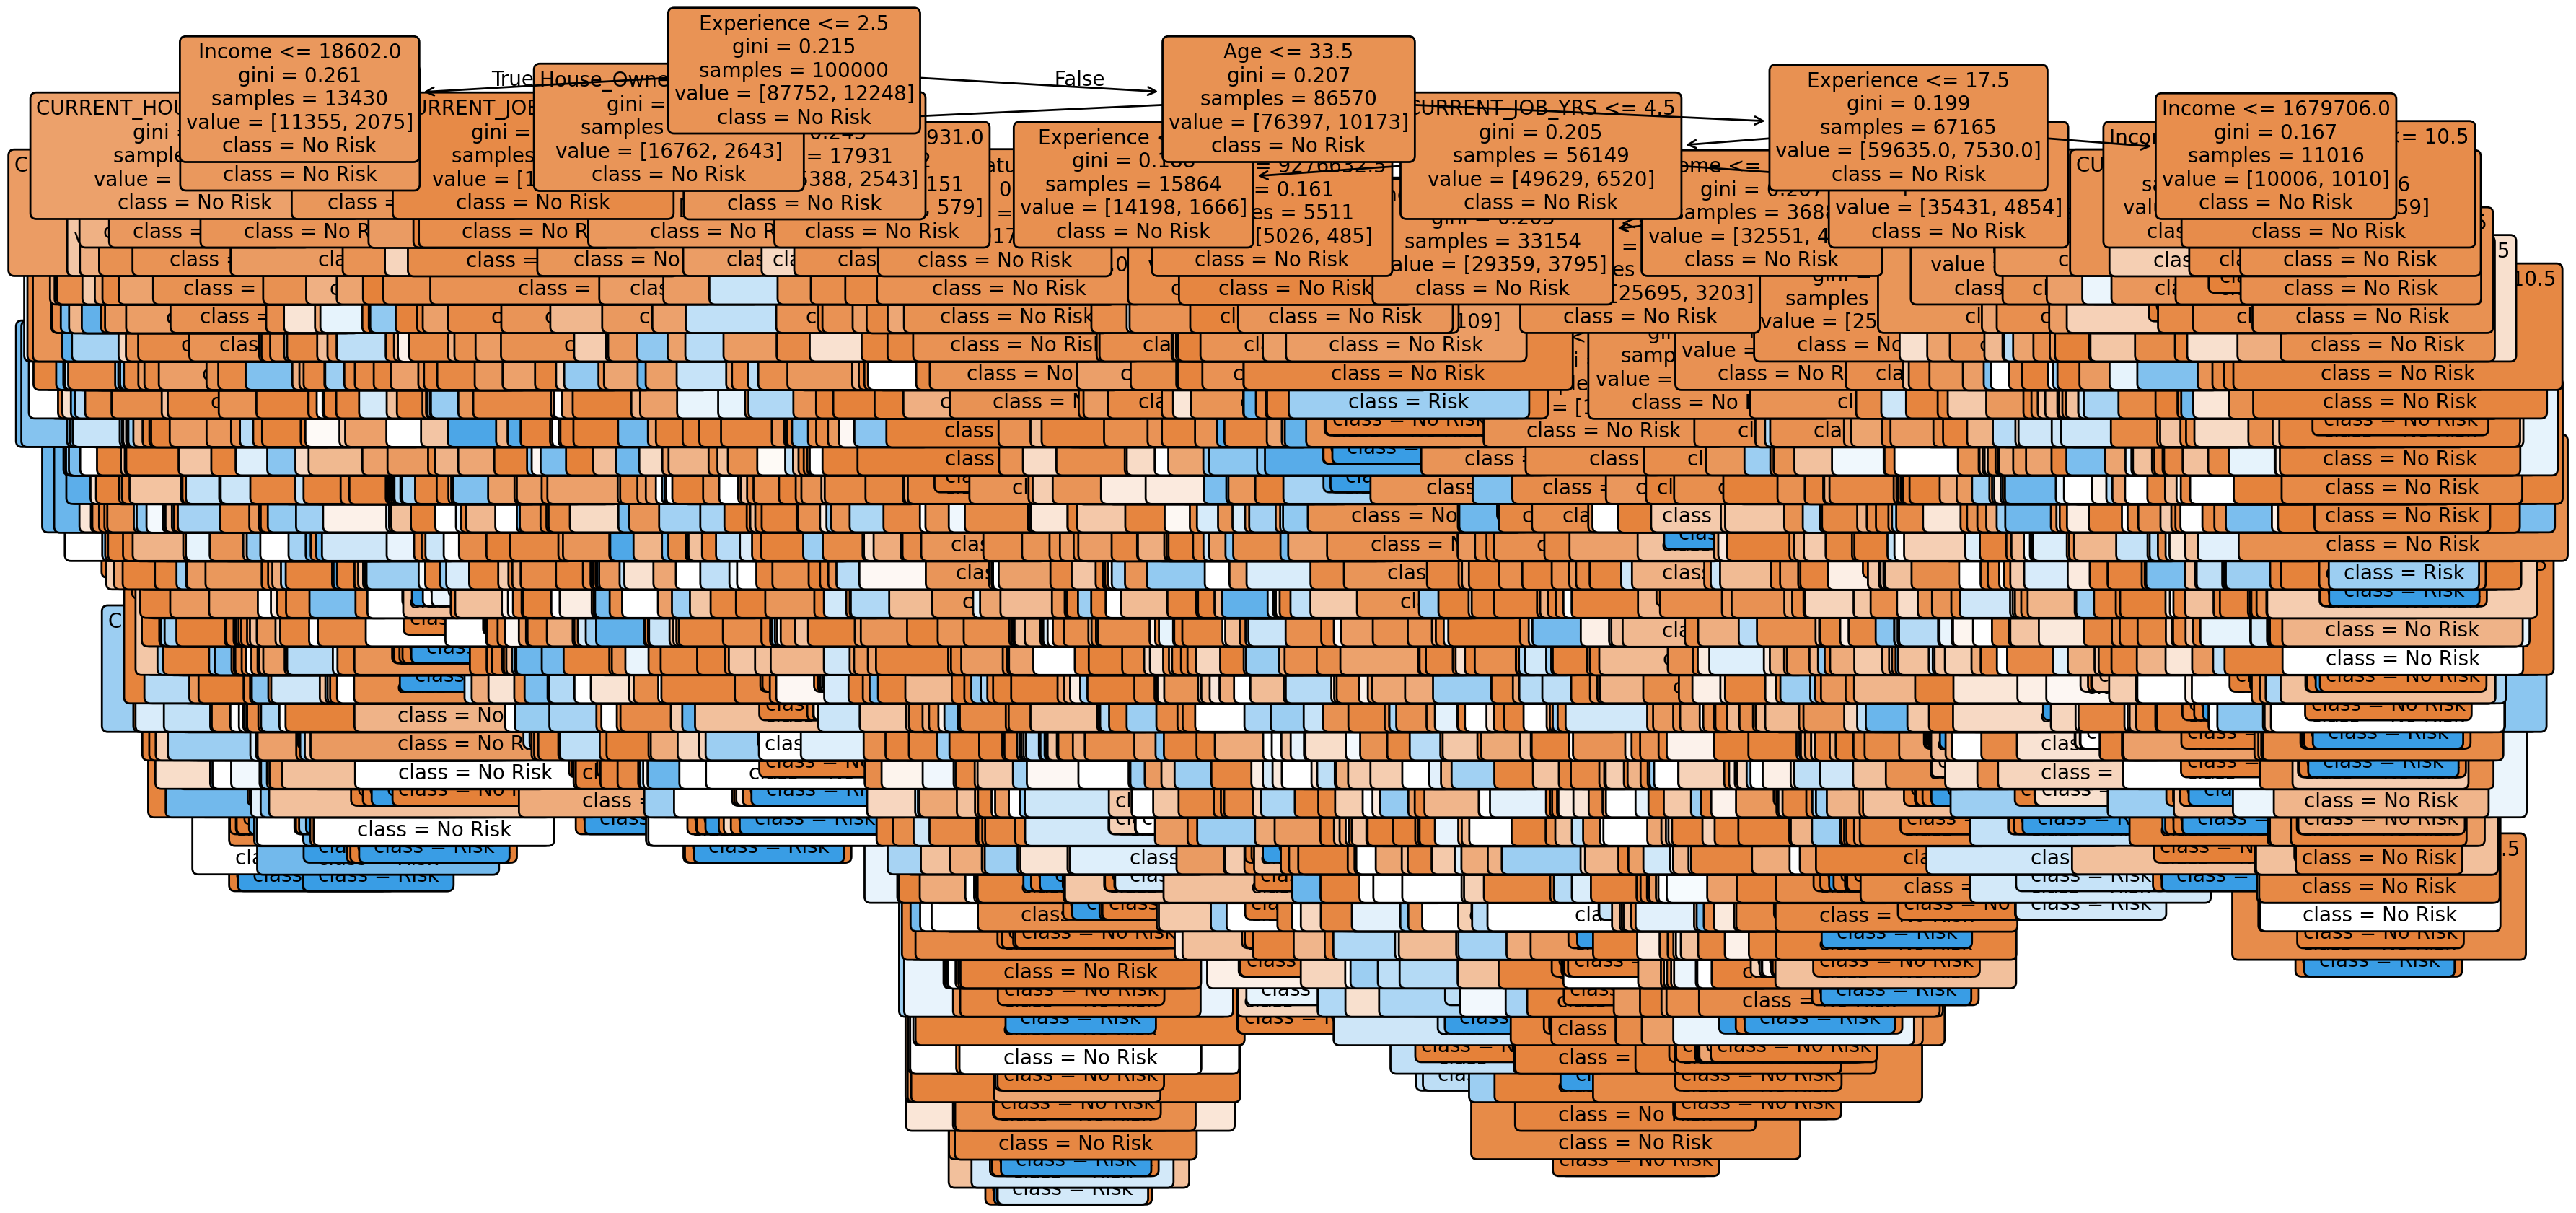

In [23]:
# Generate Decision Tree Structure using Matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['No Risk', 'Risk'], filled=True, rounded=True, fontsize=10)
plt.savefig("decision_tree_structure.png")  # Saves as an image
plt.show()

In [17]:
# Evaluate performance on test set
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     26211
           1       0.53      0.56      0.54      3789

    accuracy                           0.88     30000
   macro avg       0.73      0.74      0.74     30000
weighted avg       0.88      0.88      0.88     30000



### Apply the fitted model to the test data and determine the classification report 

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Apply the fitted model to the test data
y_pred = clf.predict(X_test)

# Display Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Additional Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     26211
           1       0.53      0.56      0.54      3789

    accuracy                           0.88     30000
   macro avg       0.73      0.74      0.74     30000
weighted avg       0.88      0.88      0.88     30000

Accuracy: 0.8812
Confusion Matrix:
[[24334  1877]
 [ 1686  2103]]
